<B>CodeClause

**Project Name- Golden Project.<br>
Task1-Building a Resume Parser Using NLP and Machine Learning.**

# Problem Statement  :      

Gone are the days when recruiters used to manually screen
resumes for a long time. Sifting through thousands of candidates' resumes for
a job is no more a challenging task- all thanks to resume parsers. Resume parsers use machine learning technology to help recruiters search thousands
of resumes in an intelligent manner so they can screen the right candidate for a job interview.
In this data science project, you will build an NLP algorithm that parses a resume and looks for the words (skills) mentioned in the job description. You
will use the Phrase Matcher feature of the NLP library Spacy that does "word/phrase" matching for the resume documents. The resume parser then counts the occurrence of words (skills) under various categories for each
resume that helps recruiters screen ideal candidates for a job.


# Importing the Libraries

In [ ]:
import pandas
import spacy
import nltk
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
import re

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Displaying the skills required

In [ ]:
skills="Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist career. Let’s look at the must-have data scientist qualifications. Key skills needed to become a data scientist: Programming Skills – knowledge of statistical programming languages like R, Python, and database query languages like SQL, Hive, Pig is desirable. Familiarity with Scala, Java, or C++ is an added advantage. Statistics – Good applied statistical skills, including knowledge of statistical tests, distributions, regression, maximum likelihood estimators, etc. Proficiency in statistics is essential for data-driven companies. Machine Learning – good knowledge of machine learning methods like k-Nearest Neighbors, Naive Bayes, SVM, Decision Forests. Strong Math Skills (Multivariable Calculus and Linear Algebra) - understanding the fundamentals of Multivariable Calculus and Linear Algebra is important as they form the basis of a lot of predictive performance or algorithm optimization techniques. Data Wrangling – proficiency in handling imperfections in data is an important aspect of a data scientist job description. Experience with Data Visualization Tools like matplotlib, ggplot, d3.js., Tableau that help to visually encode data Excellent Communication Skills – it is incredibly important to describe findings to a technical and non-technical audience. Strong Software Engineering Background Hands-on experience with data science tools Problem-solving aptitude Analytical mind and great business sense Degree in Computer Science, Engineering or relevant field is preferred Proven Experience as Data Analyst or Data Scientist"
skills

'Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist car

# Preprocessing of skills data

In [ ]:
text_nonpunc=''.join([char for char in skills if char not in string.punctuation])
skills=text_nonpunc
tokens=re.split('\W+',skills)
skills=tokens
stop_words=set(stopwords.words('english'))
re_sw=[word for word in skills if word not in stop_words]
skills=re_sw
ln=nltk.WordNetLemmatizer()
lemm=[ln.lemmatize(word) for word in skills]
skills=lemm

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc=nlp(' '.join([char for char in skills]))
def tot_list(text):
  return set(' '.join([char for char in text]).lower().split(' '))
skills_list=set(' '.join([chunk.text for chunk in doc.noun_chunks]+[token.lemma_ for token in doc if token.pos_ == "VERB"]+[entity.text for entity in doc.ents]).lower().split(' '))


# Displaying the skills list

In [ ]:
skills_list

{'add',
 'advantage',
 'algebra',
 'algorithm',
 'amount',
 'analysis',
 'analytic',
 'analytical',
 'analyze',
 'apply',
 'aptitude',
 'aspect',
 'audience',
 'background',
 'basis',
 'bayes',
 'become',
 'business',
 'c',
 'calculus',
 'career',
 'carrying',
 'certificate',
 'challenge',
 'classifier',
 'clear',
 'collaborate',
 'collection',
 'communication',
 'computer',
 'create',
 'data',
 'database',
 'decision',
 'degree',
 'describe',
 'description',
 'desirable',
 'develop',
 'dream',
 'encode',
 'engineering',
 'enhance',
 'enhancing',
 'excellent',
 'experience',
 'expert',
 'extract',
 'familiarity',
 'feature',
 'field',
 'find',
 'forests',
 'form',
 'fundamental',
 'get',
 'ggplot',
 'good',
 'handson',
 'help',
 'hive',
 'imperfection',
 'important',
 'include',
 'incredibly',
 'industry',
 'information',
 'integrity',
 'it',
 'java',
 'job',
 'key',
 'knearest',
 'knowledge',
 'language',
 'large',
 'learn',
 'learning',
 'let',
 'linear',
 'look',
 'lot',
 'machine',

# Loading the dataset

In [ ]:
df=pandas.read_csv('/content/sample_data/UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 37 to 70
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Category             962 non-null    object
 1   Resume               962 non-null    object
 2   info                 962 non-null    object
 3   clean_punc           962 non-null    object
 4   after_tokenization   962 non-null    object
 5   after_pos_tagging    962 non-null    object
 6   remove_sw            962 non-null    object
 7   after_lemmatization  962 non-null    object
 8   noun_phrases         962 non-null    object
 9   verb_forms           962 non-null    object
 10  named_entities       962 non-null    object
 11  total_words          962 non-null    object
 12  skills_matched       962 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 105.2+ KB


# There are total 962 records in dataset without any null values and the column names are **Category,Resume**

# Description about columns

1. Category =  It describes about the role/field of the job which the      applicants are insterested in

2. Resume   =  It consists of the skills mentioned by the candidates

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Sales                        40
Data Science                 40
ETL Developer                40
Mechanical Engineer          40
Operations Manager           40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
len(df['Category'].value_counts())

25

# Bar plot to visualize the resume count in each category

Text(0, 0.5, 'count')

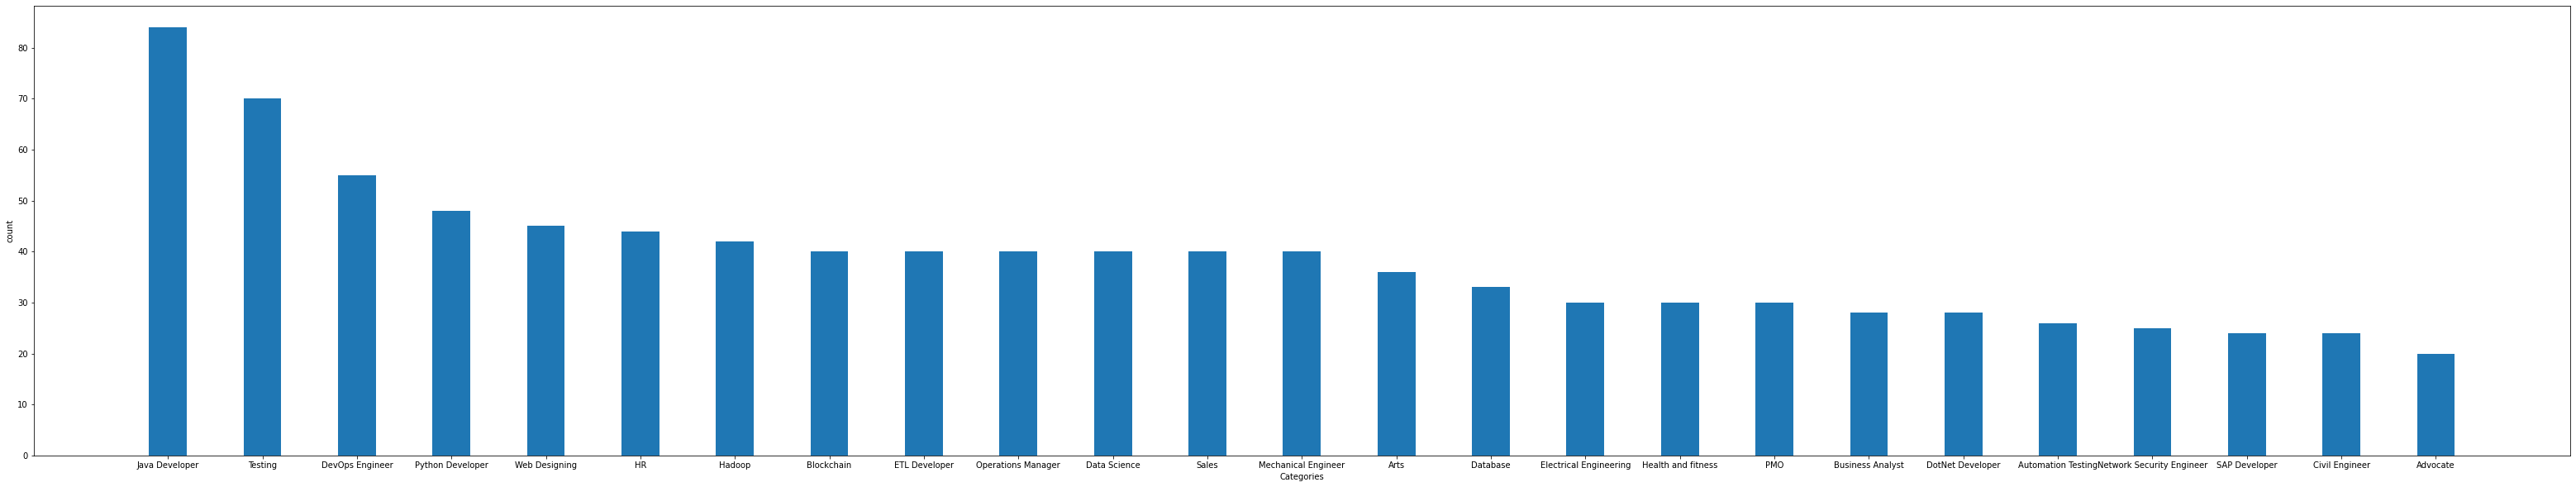

In [ ]:
fig=plt.figure(figsize=(55,10))
plt.bar(df['Category'].value_counts().keys(),df['Category'].value_counts().values,width=0.4)
plt.xlabel('Categories')
plt.ylabel('count')

# Observation in Category-wise bar chart

* Candidates are mostly mentioned in the resume as Java Developers & Testing followed by Devops
* Data Science is in 11th place out of 25 . There are only 40 records Iin Data Science Category
* Resumes in Advocate category occupies the last place ( 20 records )

# Merging Category and Resume column for finding matching words and phrases

In [ ]:
df['info']=df['Category']+' '+df['Resume']

# Removing Punctuations in newly creating info column

In [ ]:
def remove_punc(text):
  text_nonpunc=''.join([char for char in text if char not in string.punctuation])
  return text_nonpunc
df['clean_punc']=df['info'].apply(lambda x:remove_punc(x))
df.to_csv('after_remove_punc',index=False)

# Tokenization

In [ ]:
def token(text):
  tokens=re.split('\W+',text)
  return tokens
df['after_tokenization']=df['info'].apply(lambda x:token(x))
df.to_csv('after_tokenization.csv',index=False)

# pos tagging

In [ ]:
from nltk import pos_tag
def pos_tag(text):
  pos_text=nltk.pos_tag(text)
  return pos_text
df['after_pos_tagging']=df['after_tokenization'].apply(lambda x:pos_tag(x))
df.to_csv('after_pos_tagging.csv',index=False)

# Removing stopwords

In [ ]:
stop_words=set(stopwords.words('english'))
def remove_stopword(text):
  re_sw=[word for word in text if word not in stop_words]
  return re_sw
df['remove_sw']=df['after_tokenization'].apply(lambda x:remove_stopword(x))
df.to_csv('after_re_sw.csv',index=False)

# Lemmatization

In [ ]:
ln=nltk.WordNetLemmatizer()
def lemm(text):
  z=[ln.lemmatize(word) for word in text]
  return z
df['after_lemmatization']=df['remove_sw'].apply(lambda x:lemm(x))
df.to_csv('after_lemmatization.csv',index=False)

In [ ]:
nlp = spacy.load("en_core_web_sm")

# Displaying Noun phrases in each column

In [ ]:
def noun_phrases(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [chunk.text for chunk in doc.noun_chunks]
df['noun_phrases']=df['after_lemmatization'].apply(lambda x:noun_phrases(x))
df['noun_phrases']

0      [Data Science Skills Programming Languages Pyt...
1      [Data Science Education Details, Statsmodels E...
2      [Data Science Areas Interest, Design Programmi...
3      [Data Science Skills â R â Python, SAP, Tablea...
4      [Skill Details Data Structure, Exprience, Less...
                             ...                        
957    [Testing Computer Skills â Proficient MS offic...
958    [Testing â Willingness, challenge, Positive th...
959    [Testing PERSONAL, SKILLS, â Quick learner, â ...
960    [Testing COMPUTER SKILLS SOFTWARE KNOWLEDGE MS...
961    [Testing Skill Set, Windows XP, 7 8 8 1 10 Dat...
Name: noun_phrases, Length: 962, dtype: object

# Displaying Verb forms in each column

In [ ]:
def verb_forms(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [token.lemma_ for token in doc if token.pos_ == "VERB"]
df['verb_forms']=df['after_lemmatization'].apply(lambda x:verb_forms(x))
df['verb_forms']

0      [scipy, learn, learn, boost, embed, assist, ac...
1      [learn, matelab, develop, deploy, miss, deploy...
2      [excel, work, base, disclose, need, base, brin...
3      [learn, involve, analyse, come, give, carry, p...
4                                                     []
                             ...                        
957    [work, motivate, EXCEL, â, check, follow, cond...
958    [test, accept, declare, mention, bear, mention...
959    [test, learn, personal, conduct, prepare, set,...
960              [test, wind, nternet, use, use, DESIGN]
961    [os, report, handle, testing, test, analyze, p...
Name: verb_forms, Length: 962, dtype: object

# Displaying named entities

In [ ]:
def named_entities(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [entity.text for entity in doc.ents]
df['named_entities']=df['after_lemmatization'].apply(lambda x:named_entities(x))
df['named_entities']

0      [Data Science Skills Programming Languages Pyt...
1      [May 2013, May 2017, 1 year month, Exprience, ...
2      [Hindustan Aeronautics Limited Bangalore, 4 we...
3      [Advance Analytics, Social Media Analytics, NL...
4      [Faridabad Haryana Data Science, Skill Details...
                             ...                        
957    [Singh College Engineering Research Centre Dip...
958    [June 2015, Kolhapur Maharashtra, June 2012, 1...
959    [Eagerness, Competitive, Dhanraj WaghEducation...
960    [Power Point MS Office C Protius PCB, Matlab K...
961    [Database MYSQL, 2005, 2008, 2012, Languages C...
Name: named_entities, Length: 962, dtype: object

# Merging noun phrases,verb forms,named entities as a single column to find the matched words & phrases

In [ ]:
def string(text):
  return set(' '.join([char for char in text]).lower().split(' '))
df['total_words']=(df['noun_phrases']+df['verb_forms']+df['named_entities']).apply(lambda x:string(x))
df['total_words']

0      {organizations, product, question, feedback, t...
1      {paper, dimensionality, month, platform, ml, m...
2      {satish, electrical, month, xampp, disclose, j...
3      {database, month, crm, deloitte, foods, januar...
4      {itechpower, science, database, month, skill, ...
                             ...                        
957    {electrical, month, crm, powai, basic, creativ...
958    {acceptance, product, month, analyze, 2012, co...
959    {rajapur, ctr, product, successfully, analyze,...
960    {design, heart, university, 6, system, educati...
961    {database, month, analyze, 2012, â, factory, a...
Name: total_words, Length: 962, dtype: object

In [ ]:
df['total_words'][0]

{'24',
 '4',
 '6',
 'accelerate',
 'accounting',
 'action',
 'address',
 'advanced',
 'analysis',
 'analytic',
 'analytics',
 'analyze',
 'angular',
 'anomaly',
 'answer',
 'ask',
 'assist',
 'assisted',
 'associate',
 'assurance',
 'automate',
 'automated',
 'automating',
 'base',
 'based',
 'bayes',
 'boost',
 'bootstrap',
 'bot',
 'build',
 'case',
 'cassandra',
 'category',
 'chain',
 'chat',
 'chatbot',
 'classification',
 'classifier',
 'client',
 'clients',
 'cloud',
 'cluster',
 'code',
 'coding',
 'comment',
 'company',
 'computer',
 'content',
 'core',
 'cosine',
 'cost',
 'counter',
 'create',
 'created',
 'css',
 'customer',
 'customize',
 'customized',
 'cv',
 'd3',
 'dashboard',
 'data',
 'dc',
 'decision',
 'deep',
 'description',
 'details',
 'develop',
 'developed',
 'development',
 'different',
 'discovery',
 'dispute',
 'doc2vec',
 'docker',
 'domain',
 'e',
 'education',
 'effective',
 'elastic',
 'elasticsearch',
 'embed',
 'end',
 'ensure',
 'entire',
 'ernst',
 '

# Creating the no of skills matching column in each resume

In [ ]:
def ct(text):
  count=0
  for i in text:
    if i in skills_list:
      count+=1
  return count

df['skills_matched']=df['total_words'].apply(lambda x:ct(x))
df

,Category,Resume,info,clean_punc,after_tokenization,after_pos_tagging,remove_sw,after_lemmatization,noun_phrases,verb_forms,named_entities,total_words,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...,Data Science Skills Programming Languages Pyt...,"[Data, Science, Skills, Programming, Languages...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, Programming, Languages...","[Data, Science, Skills, Programming, Languages...",[Data Science Skills Programming Languages Pyt...,"[scipy, learn, learn, boost, embed, assist, ac...",[Data Science Skills Programming Languages Pyt...,"{organizations, product, question, feedback, t...",46
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science Education Details \r\nMay 2013 to...,Data Science Education Details \r\nMay 2013 to...,"[Data, Science, Education, Details, May, 2013,...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, May, 2013,...","[Data, Science, Education, Details, May, 2013,...","[Data Science Education Details, Statsmodels E...","[learn, matelab, develop, deploy, miss, deploy...","[May 2013, May 2017, 1 year month, Exprience, ...","{paper, dimensionality, month, platform, ml, m...",11
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Data Science Areas of Interest Deep Learning, ...",Data Science Areas of Interest Deep Learning C...,"[Data, Science, Areas, of, Interest, Deep, Lea...","[(Data, NNP), (Science, NNP), (Areas, NNP), (o...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data Science Areas Interest, Design Programmi...","[excel, work, base, disclose, need, base, brin...","[Hindustan Aeronautics Limited Bangalore, 4 we...","{satish, electrical, month, xampp, disclose, j...",17
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,"[Data, Science, Skills, â, R, â, Python, â, SA...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data Science Skills â R â Python, SAP, Tablea...","[learn, involve, analyse, come, give, carry, p...","[Advance Analytics, Social Media Analytics, NL...","{database, month, crm, deloitte, foods, januar...",48
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science Education Details \r\n MCA YMCA...,Data Science Education Details \r\n MCA YMCA...,"[Data, Science, Education, Details, MCA, YMCAU...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, MCA, YMCAU...","[Data, Science, Education, Details, MCA, YMCAU...","[Skill Details Data Structure, Exprience, Less...",[],"[Faridabad Haryana Data Science, Skill Details...","{itechpower, science, database, month, skill, ...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Testing Computer Skills: â¢ Proficient in MS ...,Testing Computer Skills â¢ Proficient in MS o...,"[Testing, Computer, Skills, â, Proficient, in,...","[(Testing, VBG), (Computer, NNP), (Skills, NNP...","[Testing, Computer, Skills, â, Proficient, MS,...","[Testing, Computer, Skills, â, Proficient, MS,...",[Testing Computer Skills â Proficient MS offic...,"[work, motivate, EXCEL, â, check, follow, cond...",[Singh College Engineering Research Centre Dip...,"{electrical, month, crm, powai, basic, creativ...",10
958,Testing,â Willingness to accept the challenges. â ...,Testing â Willingness to accept the challeng...,Testing â Willingness to accept the challeng...,"[Testing, â, Willingness, to, accept, the, cha...","[(Testing, VBG), (â, JJ), (Willingness, NNP), ...","[Testing, â, Willingness, accept, challenges, ...","[Testing, â, Will

# Displaying the top-10 resumes which matched more number of skills

In [ ]:
df.sort_values(by='skills_matched',inplace=True,ascending=False)
df[['Category','Resume','skills_matched']].head()

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48


# Resumes which skills matched more than 40

In [ ]:
df[df['skills_matched']>=40][['Category','Resume','skills_matched']]

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
33,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
23,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
0,Data Science,Skills * Programming Languages: Python (pandas...,46
428,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...,46


In [ ]:
len(df[df['skills_matched']>=40][['Category','Resume','skills_matched']])

34

# There are 34 resumes which the number of skills matched is more than 40

# Skills matching values & their record counts

In [ ]:
df['skills_matched'].value_counts()

7     70
14    62
27    60
9     51
11    48
13    45
10    40
8     40
20    40
19    39
3     38
18    33
15    31
12    29
17    29
5     26
23    22
4     20
46    20
34    18
2     18
32    16
38    16
21    16
22    15
25    14
37    14
28    12
29    10
39    10
16     9
33     8
6      6
44     6
36     6
24     5
48     4
31     4
30     4
49     4
26     3
35     1
Name: skills_matched, dtype: int64

Text(0.5, 1.0, 'Skill matching values count in different ranges')

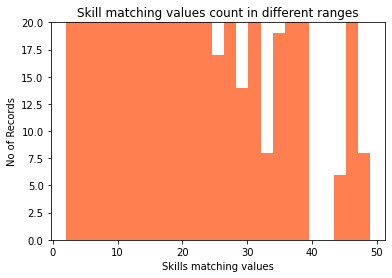

In [ ]:
plt.hist(df['skills_matched'],bins=25,color='coral')
plt.ylim(0,20)
plt.xlabel('Skills matching values')
plt.ylabel('No of Records')
plt.title('Skill matching values count in different ranges')

# Observation in above chart :

*  Most of the resumes are not properly matched the skillsets and matched skillsets are below 40
* Only 34 resumes are matching more than 40 resumes

# Conclusion :

* We can select resumes which are matching more than 40 skillsets.**34 Records** are present which matched more than 40 phrases.

